# Get the data

In [ ]:
!kaggle datasets download -d harshvardhan21/sign-language-detection-using-images

Dataset URL: https://www.kaggle.com/datasets/harshvardhan21/sign-language-detection-using-images
License(s): apache-2.0
100% 267M/268M [00:09<00:00, 32.7MB/s]
100% 268M/268M [00:09<00:00, 29.3MB/s]


In [ ]:
!unzip /content/sign-language-detection-using-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/V/819.jpg          
  inflating: data/V/82.jpg           
  inflating: data/V/820.jpg          
  inflating: data/V/821.jpg          
  inflating: data/V/822.jpg          
  inflating: data/V/823.jpg          
  inflating: data/V/824.jpg          
  inflating: data/V/825.jpg          
  inflating: data/V/826.jpg          
  inflating: data/V/827.jpg          
  inflating: data/V/828.jpg          
  inflating: data/V/829.jpg          
  inflating: data/V/83.jpg           
  inflating: data/V/830.jpg          
  inflating: data/V/831.jpg          
  inflating: data/V/832.jpg          
  inflating: data/V/833.jpg          
  inflating: data/V/834.jpg          
  inflating: data/V/835.jpg          
  inflating: data/V/836.jpg          
  inflating: data/V/837.jpg          
  inflating: data/V/838.jpg          
  inflating: data/V/839.jpg          
  inflating: data/V/84.jpg           
  inflating: data/V/840.jpg          

# Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Load Data

In [ ]:
# Path to the dataset directory
dataset_path = '/content/data'

# Set the batch size, which determines the number of samples that will be propagated through the network at once
batch_size = 32

# Define the target width and height for resizing the images
img_width = 64
img_height = 64

# Load and preprocess the training dataset from the directory
train_dataset = image_dataset_from_directory(
    dataset_path,                  # Directory containing the dataset
    image_size=(img_height, img_width),  # Resize images to the target size (64x64)
    batch_size=batch_size,          # Number of samples per batch
    label_mode='categorical',       # Labels are returned as one-hot encoded vectors for multi-class classification
    shuffle=True,                   # Shuffle the dataset to prevent the model from learning the order of the samples
    color_mode='rgb',               # Load images in RGB color format (3 channels)
    subset='training',              # Define this subset as the training data
    validation_split=0.2,           # Split 20% of the dataset for validation, leaving 80% for training
    seed=42                         # Set the random seed for reproducibility of the shuffle and split
)

# Load and preprocess the validation dataset from the directory
validation_dataset = image_dataset_from_directory(
    dataset_path,                   # Same directory for the dataset
    image_size=(img_height, img_width),  # Same image size
    batch_size=batch_size,          # Same batch size
    label_mode='categorical',       # Same label format (one-hot encoded)
    shuffle=True,                   # Shuffle the dataset (usually unnecessary for validation, but included here)
    color_mode='rgb',               # Same color mode
    subset='validation',            # Define this subset as the validation data
    validation_split=0.2,           # Same split, but selecting the validation subset
    seed=42                         # Same random seed for consistency
)

Found 42000 files belonging to 35 classes.
Using 33600 files for training.
Found 42000 files belonging to 35 classes.
Using 8400 files for validation.


# Data Augmentation

In [ ]:
# Data augmentation pipeline to enhance the training dataset with randomized transformations
data_augmentation = Sequential([
    RandomFlip("horizontal"),   # Randomly flip images horizontally (left to right)
    RandomRotation(0.1),        # Randomly rotate images by up to 10% of 360 degrees
    RandomZoom(0.1),            # Randomly zoom into the image by up to 10%
])

# Modeling

## Model Architecture

In [ ]:
# Define the model architecture using the Sequential API
model = Sequential([
    # First convolutional layer with 32 filters, a 4x4 kernel, ReLU activation, and specified input shape
    Conv2D(32, kernel_size=(4, 4), activation='relu', input_shape=(img_height, img_width, 3)),

    # Data augmentation applied within the model, which helps to generate additional training samples on the fly
    data_augmentation,

    # Rescaling the pixel values from [0, 255] to [0, 1] for normalization
    Rescaling(1./255),

    # Max pooling layer to downsample the feature maps by taking the maximum value over a 2x2 pool size
    MaxPool2D(2, 2),

    # Flatten the output of the pooling layer to convert the 2D matrix into a 1D vector
    Flatten(),

    # First dense (fully connected) layer with 16 units and ReLU activation
    Dense(16, activation="relu"),

    # Second dense layer with 8 units and ReLU activation
    Dense(8, activation="relu"),

    # Output layer with a number of units equal to the number of classes in the dataset
    # Softmax activation is used to produce a probability distribution for multi-class classification
    Dense(len(train_dataset.class_names), activation="softmax")
])

## Model Summary

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 61, 61, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 61, 61, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │         460,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 35)                  │             315 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 462,835 (1.77 MB)

 Trainable params: 462,835 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

In [ ]:
# Compile the model with the specified optimizer, loss function, and evaluation metrics
model.compile(
    optimizer='adam',                   # Adam optimizer, known for its adaptive learning rate, efficient for most tasks
    loss='categorical_crossentropy',     # Loss function for multi-class classification (one-hot encoded labels)
    metrics=['accuracy']                 # Accuracy metric to evaluate the performance of the model during training and testing
)

In [ ]:
# Set the number of epochs (complete passes through the training dataset)
# Epochs set to 10 to save time but you should add more
epochs = 10

# Train the model using the training dataset and validate on the validation dataset after each epoch
history = model.fit(
    train_dataset,               # Training data
    validation_data=validation_dataset,  # Validation data used to evaluate the model's performance after each epoch
    epochs=epochs                # Number of epochs to train the model
)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.2407 - loss: 2.6603 - val_accuracy: 0.8945 - val_loss: 0.4145
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9059 - loss: 0.3313 - val_accuracy: 0.9794 - val_loss: 0.0786
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9766 - loss: 0.0844 - val_accuracy: 0.9964 - val_loss: 0.0158
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9869 - loss: 0.0460 - val_accuracy: 0.9993 - val_loss: 0.0061
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9922 - loss: 0.0271 - val_accuracy: 0.9957 - val_loss: 0.0143
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9911 - loss: 0.0338 - val_accuracy: 0.9996 - val_loss: 0.0038
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9951 - loss: 0.0170 - val_accuracy: 0.9896 - val_loss: 0.0266
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9895 -

## Model Evaluation

In [ ]:
# Evaluate the model's performance on the validation dataset after training
evaluation_results = model.evaluate(
    validation_dataset           # Validation dataset used to assess the model's performance
)

# Print the evaluation results (typically includes the loss and accuracy)
print(f"Validation Loss: {evaluation_results[0]}")
print(f"Validation Accuracy: {evaluation_results[1]}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9998 - loss: 0.0017
Validation Loss: 0.001954645151272416
Validation Accuracy: 0.9997618794441223


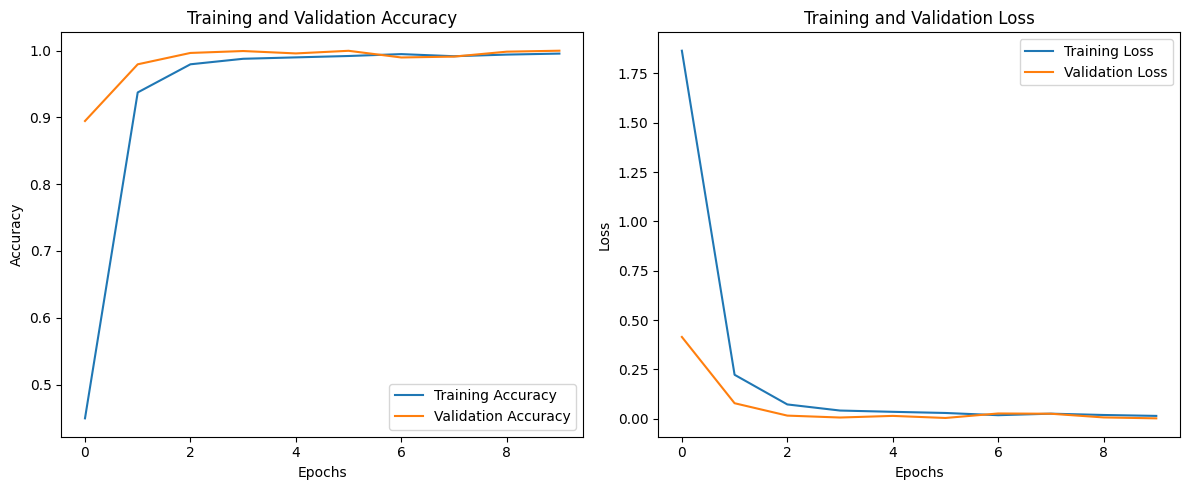

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()